<a href="https://colab.research.google.com/github/AdamLoydHarris/RoboSmile_Measurement/blob/main/NM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Import packages
from pathlib import Path
import json
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
BASE_URL = 'https://api.figshare.com/v2'
article_id = '28811129'
r = requests.get(url=(BASE_URL + '/articles/' + article_id))
meta_data = r.json()
files_meta_data = meta_data['files']

In [ ]:
files_meta_data

[{'id': 54183923,
  'name': 'Beh_naive_test1.npy',
  'size': 432561586,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/54183923',
  'supplied_md5': 'c582b1937ee1917dce1512036b346ba3',
  'computed_md5': 'c582b1937ee1917dce1512036b346ba3',
  'mimetype': 'application/octet-stream'},
 {'id': 54183908,
  'name': 'Beh_naive_test2.npy',
  'size': 286584765,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/54183908',
  'supplied_md5': 'b622db42667fb01b433eef841dd58599',
  'computed_md5': 'b622db42667fb01b433eef841dd58599',
  'mimetype': 'application/octet-stream'},
 {'id': 54183926,
  'name': 'Beh_naive_test3.npy',
  'size': 430048721,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/54183926',
  'supplied_md5': '6261f3c6f0da26630522ca6d0724e4a9',
  'computed_md5': '6261f3c6f0da26630522ca6d0724e4a9',
  'mimetype': 'application/octet-stream'},
 {'id': 54183875,
  'name': 'Beh_sup_test1.npy',


In [ ]:
# extract behavioral file names
files = {}
for file in files_meta_data:
    if file['name'].startswith('Beh'):
        files[file['id']] = file['name']

In [ ]:
files

{54183923: 'Beh_naive_test1.npy',
 54183908: 'Beh_naive_test2.npy',
 54183926: 'Beh_naive_test3.npy',
 54183875: 'Beh_sup_test1.npy',
 54183869: 'Beh_sup_test2.npy',
 54183872: 'Beh_sup_test3.npy',
 54183860: 'Beh_sup_train1_after_learning.npy',
 54183863: 'Beh_sup_train1_before_learning.npy',
 54183866: 'Beh_sup_train2_after_learning.npy',
 54183881: 'Beh_sup_train2_before_learning.npy',
 54183890: 'Beh_test1_after_grating.npy',
 54183878: 'Beh_test1_before_grating.npy',
 54183896: 'Beh_test2_after_grating.npy',
 54183884: 'Beh_test2_before_grating.npy',
 54183893: 'Beh_train1_after_grating.npy',
 54183887: 'Beh_train1_before_grating.npy',
 54183911: 'Beh_unsup_test1.npy',
 54183905: 'Beh_unsup_test2.npy',
 54183920: 'Beh_unsup_test3.npy',
 54183917: 'Beh_unsup_train1_after_learning.npy',
 54183914: 'Beh_unsup_train1_before_learning.npy',
 54183902: 'Beh_unsup_train2_after_learning.npy',
 54183899: 'Beh_unsup_train2_before_learning.npy',
 54183929: 'Beh_no_pretrain.npy',
 54183932: 'B

In [ ]:
# @title Data loading and imports

# set path for data
root = r'/content'
Path(root).mkdir(exist_ok=True)
root = r'/content/Zhong_et_al_2025'
Path(root).mkdir(exist_ok=True)

# download files from Figshare
file_ID = [54183860, 54183875, 54183863] # IDs of files

for id in file_ID:
  fn = os.path.join(root, files[id])
  if not os.path.isfile(fn):
    response = requests.get(BASE_URL + '/file/download/' + str(id), stream=True, timeout=10)
    open(fn, 'wb').write(response.content)
    total_size = int(response.headers.get('content-length', 0))
    with open(fn, 'wb') as f, tqdm(total=total_size, unit='B', unit_scale=True, desc=files[id]) as pbar:
      for chunk in response.iter_content(chunk_size=8192):
        if chunk:
          f.write(chunk)
          pbar.update(len(chunk))

In [ ]:
train1_after = np.load(os.path.join(root, 'Beh_sup_train1_after_learning.npy'), allow_pickle=True).item()['VR2_2021_04_06_1']


In [ ]:
train1_after.keys()

dict_keys(['ntrials', 'trInd', 'trInd_odd', 'trInd_even', 'Trial_start_time', 'Trial_end_time', 'SubjMove', 'Gray_space_time', 'SoundPos', 'SoundTime', 'SoundTimeDelay', 'RewTime', 'RewPos', 'isRew', 'WallType', 'WallIsProbe', 'WallName', 'UniqWalls', 'LickTrind', 'LickTime', 'LickPos', 'Lick_wallName', 'VRposTime', 'VRpos', 'VRposCum', 'ft', 'ft_trInd', 'ft_trInd_odd', 'ft_trInd_even', 'ft_PosCum', 'ft_Pos', 'ft_move', 'ft_isMoving', 'ft_GraySpc', 'ft_CorrSpc', 'ft_WallID', 'ft_RunCum', 'ft_RunSpeed', 'Corridor_Length', 'Gray_Space_length', 'Texture_Length', 'run_pos', 'RewardFr', 'StartFr', 'GrayFr', 'EndFr', 'LickFr', 'SoundFr', 'SoundDelayFr', 'SoundDelPos', 'RunFr', 'BefCueFr', 'AftCueFr', 'stim_id', 'TrialStim', 'StimTrial', 'StimFrame', 'Reward_Mode', 'Reward_Delay_ms'])

In [ ]:
train1_before = np.load(os.path.join(root, 'Beh_sup_train1_before_learning.npy'), allow_pickle=True).item()['VR2_2021_03_20_1']

In [ ]:
train1_before.keys()

dict_keys(['ntrials', 'trInd', 'trInd_odd', 'trInd_even', 'Trial_start_time', 'Trial_end_time', 'SubjMove', 'Gray_space_time', 'SoundPos', 'SoundTime', 'SoundTimeDelay', 'RewTime', 'RewPos', 'isRew', 'WallType', 'WallIsProbe', 'WallName', 'UniqWalls', 'LickTrind', 'LickTime', 'LickPos', 'Lick_wallName', 'VRposTime', 'VRpos', 'VRposCum', 'ft', 'ft_trInd', 'ft_trInd_odd', 'ft_trInd_even', 'ft_PosCum', 'ft_Pos', 'ft_move', 'ft_isMoving', 'ft_GraySpc', 'ft_CorrSpc', 'ft_WallID', 'ft_RunCum', 'ft_RunSpeed', 'Corridor_Length', 'Gray_Space_length', 'Texture_Length', 'run_pos', 'RewardFr', 'StartFr', 'GrayFr', 'EndFr', 'LickFr', 'SoundFr', 'SoundDelayFr', 'SoundDelPos', 'RunFr', 'BefCueFr', 'AftCueFr', 'stim_id', 'TrialStim', 'StimTrial', 'StimFrame', 'Reward_Mode', 'Reward_Delay_ms'])

In [ ]:
train1_after['LickFr'].shape


(1605,)

In [ ]:
train1_after['ft_move'].shape


(17761,)

In [ ]:
train1_after['WallType'].shape

(470,)

In [ ]:
train1_after['isRew'].shape

(470,)

In [ ]:
train1_after['ft_RunSpeed'].shape

(17761,)

In [ ]:
#trial frames, each key correspond to trial number, and the value of each key is the index of frames associated with that trial
trial_frames = {}
for tr_ind, rew in enumerate(train1_after['isRew']):
  if rew:
   trial_frames[tr_ind] = train1_after['ft_trInd'] == tr_ind


In [ ]:
#for loop for each trial frame and count number of licks asociated to this trial
licks_per_trial = {}
for tr_ind in trial_frames:
  licks_per_trial[tr_ind] =  np.sum(train1_after['LickTrind']== tr_ind)
# train1_after['LickTrind']==0
licks_per_trial

{0: np.int64(10),
 1: np.int64(8),
 2: np.int64(11),
 5: np.int64(13),
 6: np.int64(9),
 8: np.int64(10),
 9: np.int64(7),
 12: np.int64(11),
 14: np.int64(10),
 15: np.int64(9),
 16: np.int64(5),
 18: np.int64(12),
 19: np.int64(7),
 22: np.int64(8),
 23: np.int64(14),
 28: np.int64(8),
 31: np.int64(12),
 35: np.int64(4),
 38: np.int64(13),
 41: np.int64(4),
 44: np.int64(10),
 47: np.int64(5),
 48: np.int64(9),
 49: np.int64(6),
 52: np.int64(9),
 55: np.int64(9),
 57: np.int64(9),
 60: np.int64(6),
 61: np.int64(6),
 63: np.int64(6),
 66: np.int64(5),
 69: np.int64(6),
 70: np.int64(6),
 71: np.int64(5),
 72: np.int64(11),
 74: np.int64(11),
 76: np.int64(2),
 77: np.int64(12),
 78: np.int64(9),
 80: np.int64(8),
 81: np.int64(9),
 84: np.int64(3),
 85: np.int64(6),
 87: np.int64(5),
 88: np.int64(10),
 92: np.int64(15),
 93: np.int64(4),
 94: np.int64(12),
 95: np.int64(5),
 97: np.int64(4),
 98: np.int64(4),
 99: np.int64(10),
 100: np.int64(3),
 107: np.int64(10),
 111: np.int64

In [ ]:
trial_frames


{0: array([False, False, False, ..., False, False, False]),
 1: array([False, False, False, ..., False, False, False]),
 2: array([False, False, False, ..., False, False, False]),
 5: array([False, False, False, ..., False, False, False]),
 6: array([False, False, False, ..., False, False, False]),
 8: array([False, False, False, ..., False, False, False]),
 9: array([False, False, False, ..., False, False, False]),
 12: array([False, False, False, ..., False, False, False]),
 14: array([False, False, False, ..., False, False, False]),
 15: array([False, False, False, ..., False, False, False]),
 16: array([False, False, False, ..., False, False, False]),
 18: array([False, False, False, ..., False, False, False]),
 19: array([False, False, False, ..., False, False, False]),
 22: array([False, False, False, ..., False, False, False]),
 23: array([False, False, False, ..., False, False, False]),
 28: array([False, False, False, ..., False, False, False]),
 31: array([False, False, False

In [ ]:
trial_frames.keys()

dict_keys([0, 1, 2, 5, 6, 8, 9, 12, 14, 15, 16, 18, 19, 22, 23, 28, 31, 35, 38, 41, 44, 47, 48, 49, 52, 55, 57, 60, 61, 63, 66, 69, 70, 71, 72, 74, 76, 77, 78, 80, 81, 84, 85, 87, 88, 92, 93, 94, 95, 97, 98, 99, 100, 107, 111, 113, 114, 115, 117, 120, 123, 124, 126, 127, 129, 130, 133, 134, 135, 139, 140, 142, 145, 148, 155, 157, 160, 165, 166, 170, 172, 174, 175, 178, 179, 181, 182, 184, 187, 191, 192, 197, 198, 202, 203, 206, 208, 212, 217, 219, 220, 223, 224, 228, 229, 231, 233, 236, 237, 238, 239, 241, 243, 244, 246, 248, 252, 253, 258, 259, 261, 262, 263, 264, 265, 266, 267, 271, 275, 278, 280, 285, 288, 290, 292, 293, 296, 297, 299, 302, 303, 305, 306, 308, 310, 311, 313, 314, 318, 326, 327, 328, 329, 330, 331, 332, 334, 335, 336, 342, 344, 353, 355, 356, 358, 360, 362, 364, 365, 368, 369, 372, 376, 377, 378, 380, 381, 382, 383, 385, 386, 390, 391, 393, 395, 398, 399, 400, 401, 402, 403, 404, 405, 407, 409, 410, 411, 412, 413, 414, 415, 419, 420, 422, 423, 424, 429, 433, 434, 437

In [ ]:
# ft_Runspeed for the rewarded frames (trial_frames)
trial_speed = {}
for tr_ind in trial_frames:
  trial_speed[tr_ind] = np.mean(train1_after['ft_RunSpeed'][trial_frames[tr_ind]])

In [ ]:
trial_speed

{0: np.float64(15.569749209126911),
 1: np.float64(21.162942786129776),
 2: np.float64(17.11161896775453),
 5: np.float64(19.99829590948246),
 6: np.float64(18.21435614659384),
 8: np.float64(13.46388253428561),
 9: np.float64(21.79716767832102),
 12: np.float64(23.149172706163846),
 14: np.float64(33.49290589332045),
 15: np.float64(29.647510222351542),
 16: np.float64(35.532521476361644),
 18: np.float64(30.00044002873902),
 19: np.float64(29.863959539712585),
 22: np.float64(28.9044371310433),
 23: np.float64(26.47011662560802),
 28: np.float64(28.74721793478288),
 31: np.float64(26.648450907753336),
 35: np.float64(39.6549912667341),
 38: np.float64(30.544982727134872),
 41: np.float64(47.47965129168069),
 44: np.float64(33.31077268098047),
 47: np.float64(33.40692404327896),
 48: np.float64(32.205275860792966),
 49: np.float64(34.848179534884885),
 52: np.float64(38.7491654528129),
 55: np.float64(33.74895070395724),
 57: np.float64(35.406963080920335),
 60: np.float64(39.16355858

In [ ]:
mean_speed_per_trial = {}
for tr_ind in trial_frames:
  move_frames = trial_frames[tr_ind] & (train1_after['ft_move'] > 0)
  mean_speed_per_trial[tr_ind] = np.mean(train1_after['ft_move'][move_frames])

In [ ]:
mean_speed_per_trial

{0: np.float64(1.3547969635997874),
 1: np.float64(1.6911123886174275),
 2: np.float64(2.1777777777777896),
 5: np.float64(1.5206119027661444),
 6: np.float64(1.568421052631587),
 8: np.float64(1.637291860175356),
 9: np.float64(1.7277302027216492),
 12: np.float64(1.7866754629622041),
 14: np.float64(2.4290610328638613),
 15: np.float64(1.85159197609903),
 16: np.float64(2.6056715736619984),
 18: np.float64(2.3069872750200706),
 19: np.float64(1.8900842076513698),
 22: np.float64(2.3706570851674225),
 23: np.float64(1.7731219236665954),
 28: np.float64(1.8267175282607298),
 31: np.float64(2.5070208667204192),
 35: np.float64(2.53634980410057),
 38: np.float64(1.7035687380495022),
 41: np.float64(2.6041284966904246),
 44: np.float64(1.751614731018344),
 47: np.float64(1.7643338790462488),
 48: np.float64(2.274492230317894),
 49: np.float64(1.8774669736669125),
 52: np.float64(2.4923899683435593),
 55: np.float64(1.8818460192476039),
 57: np.float64(1.7164510404074382),
 60: np.float64(

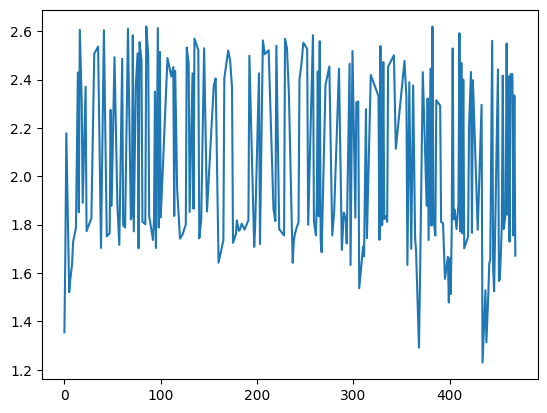

In [ ]:
plt.plot(list(mean_speed_per_trial.keys()), list(mean_speed_per_trial.values()))

Text(0, 0.5, 'Speed')

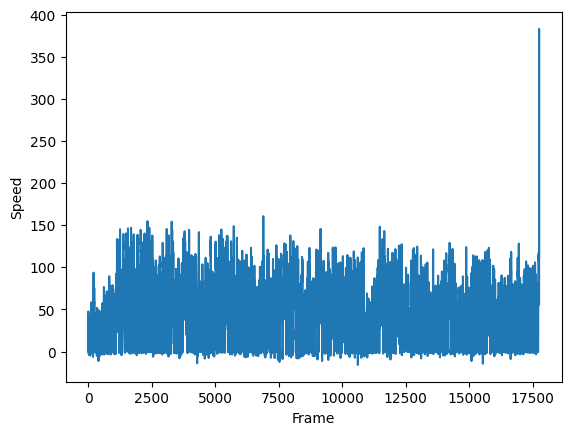

In [ ]:
# plot trial trial speed per frame
plt.plot(train1_after['ft_RunSpeed'])
#define x and y axis
plt.xlabel('Frame')
plt.ylabel('Speed')




Text(0, 0.5, 'Speed')

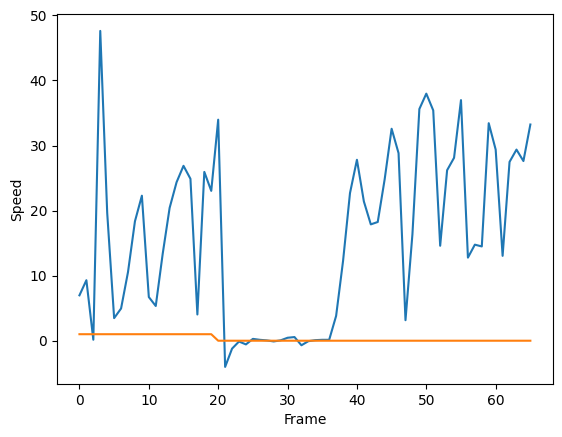

In [ ]:
# plot trial speed per frame for one trial
plt.plot(train1_after['ft_RunSpeed'][trial_frames[0]])
#define x and y axis
plt.xlabel('Frame')
plt.ylabel('Speed')

plt.plot(train1_after['BefCueFr'][trial_frames[0]])
# plt.plot(train1_after['LickTrind'])
#define x and y axis
plt.xlabel('Frame')
plt.ylabel('Speed')



Text(0, 0.5, 'Licks')

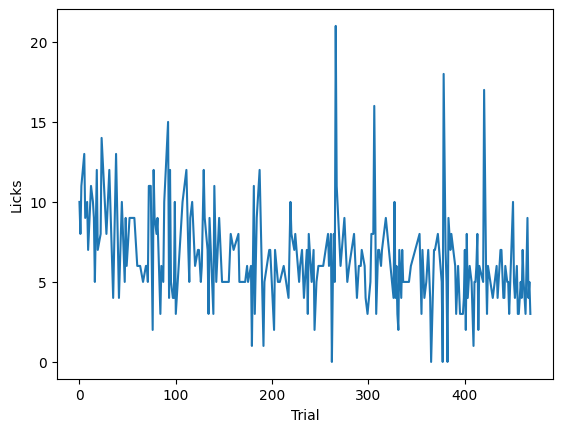

In [ ]:
#plot licks per trial
plt.plot(list(licks_per_trial.keys()), list(licks_per_trial.values()))
# plt.plot(licks_per_trial.values )
plt.xlabel('Trial')
plt.ylabel('Licks')



In [ ]:
train1_after['LickFr']

array([1.44621460e+01, 2.08204557e+01, 2.65266658e+01, ...,
       1.76365930e+04, 1.76412943e+04, 1.76418172e+04])

In [ ]:
train1_after['LickPos']

array([ 7.6, 15. , 20.6, ..., 15.2, 19.6, 19.6])

In [ ]:
train1_after['ft_Pos']

array([ 0. ,  0. ,  0. , ..., 59.8, 59.8, 59.8])

In [ ]:
#frames for each trial and get position per trial
trial_pos = {}
for tr_ind in trial_frames:
  trial_pos[tr_ind] = np.round(train1_after['ft_Pos'][trial_frames[tr_ind]],decimals=1)

In [ ]:
#lick position per trial

lick_pos = {}
for tr_ind in trial_frames:
  temp=np.zeros_like(trial_pos[tr_ind])
  temp[:]=np.nan
  # print(temp
  lick_pos[tr_ind] = np.round(train1_after['LickPos'][train1_after['LickTrind'] == tr_ind], decimals=1)


In [ ]:
lick_pos

{0: array([ 7.6, 15. , 20.6, 20.6, 20.6, 20.6, 20.6, 20.6, 20.6, 32.4]),
 1: array([10.4, 12.6, 14.8, 15.2, 15.2, 15.2, 15.2, 15.2]),
 2: array([17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 17.4, 30.2, 57.6]),
 5: array([ 8.6, 20.2, 21.6, 24.8, 25.6, 25.6, 25.6, 25.6, 25.6, 25.6, 25.6,
        25.6, 25.6]),
 6: array([ 8. , 13.2, 14.2, 17.8, 17.8, 17.8, 17.8, 17.8, 24.6]),
 8: array([12.4, 13.4, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8, 13.8]),
 9: array([ 9.6, 10.8, 12.2, 13.6, 16.4, 17. , 17. ]),
 12: array([11.8, 12.2, 20.6, 22.6, 24.6, 24.6, 24.6, 24.6, 24.6, 24.6, 57.2]),
 14: array([ 0. ,  0.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29.2, 29.2]),
 15: array([ 7.8, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2, 16.2]),
 16: array([18.6, 19.2, 19.2, 19.2, 19.2]),
 18: array([ 8.2,  8.4, 19.2, 21.4, 27.4, 27.8, 27.8, 27.8, 27.8, 27.8, 27.8,
        27.8]),
 19: array([18.2, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2]),
 22: array([30.6, 30.6, 30.6, 30.6, 30.6, 30.6, 30.6, 30.6]),
 23: array([ 2.

In [ ]:
#an array same size as the whole frames, and keep true values where the lick_pos frames are
lick_frames = np.zeros(train1_after['ft_Pos'].shape)
for tr_ind in lick_pos:
  # lick_frames[trial_pos[tr_ind] == lick_pos[tr_ind]] = 1


ValueError: operands could not be broadcast together with shapes (66,) (10,) 

Text(0, 0.5, 'Position')

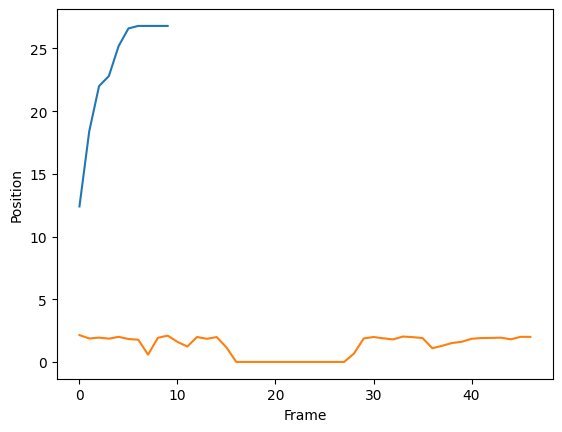

In [ ]:
#plot lick_pos[0](frames where mouse licked) with mouse against the reward frames
plt.plot(lick_pos[327])
# plt.plot(trial_pos[0])
plt.plot(train1_after['ft_move'][trial_frames[327]])

#define x and y axis
# plt.plot(lick_pos[0])
plt.xlabel('Frame')
plt.ylabel('Position')

Text(0, 0.5, 'Boolean')

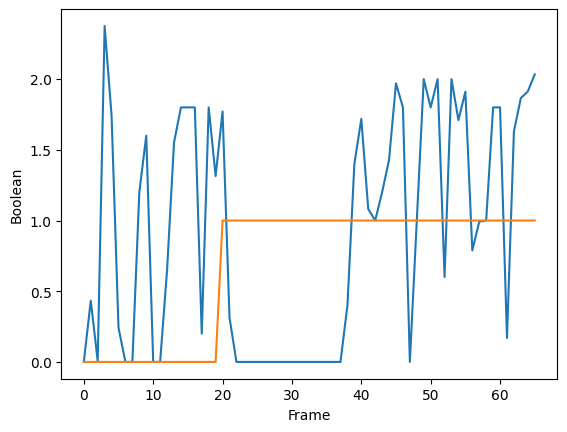

In [ ]:
# plot trial acceleration per frame for one trial
plt.plot(train1_after['ft_move'][trial_frames[0]])
#define x and y axis
plt.xlabel('Frame')
plt.ylabel('Acceleration')

#beh['BefCueFr']: boolean values indicating neural frames after entered corridor but before cue was delivered
# beh['AftCueFr']: boolean values indicating neural frames after cue was delivered
# plot befcuefr and aftercuefr
# plt.plot(train1_after['BefCueFr'][trial_frames[0]])
plt.plot(train1_after['AftCueFr'][trial_frames[0]])
#define x and y axis
plt.xlabel('Frame')
plt.ylabel('Boolean')


In [ ]:
train1_after['ft_RunSpeed']


array([  0.        ,   3.03847599,   3.03701947, ..., 111.59476749,
       383.37395862,  56.02954544])

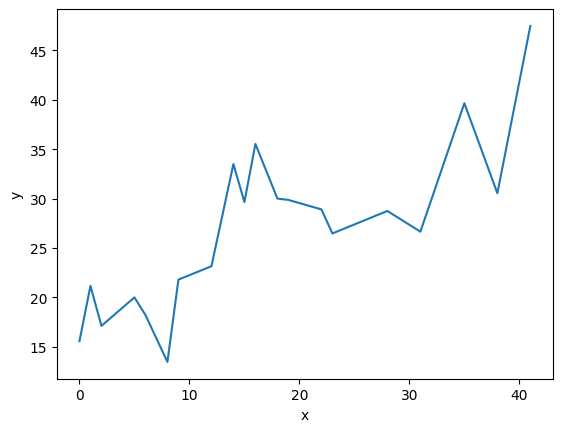

In [ ]:
# Select the first 20 trial indices and their corresponding mean speeds
first_20_trial_indices = list(trial_speed.keys())[:20]
first_20_mean_speeds = [trial_speed[tr_ind] for tr_ind in first_20_trial_indices]

plt.plot(first_20_trial_indices, first_20_mean_speeds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('')
plt.show()

Text(0, 0.5, 'Speed')

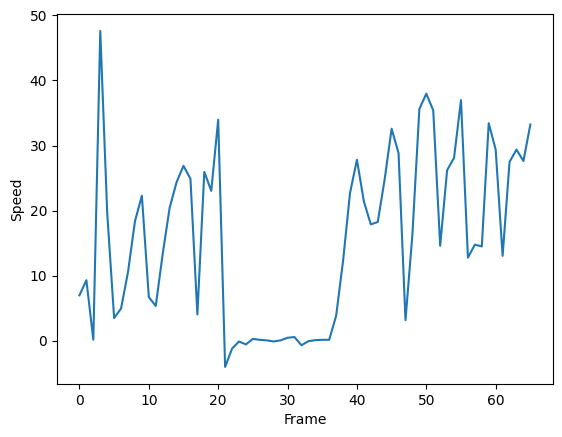

In [ ]:
#plot the speed per frame in one trial against the lick behavior
plt.plot(train1_after['ft_RunSpeed'][trial_frames[0]])
#define x and y axis
plt.xlabel('Frame')
plt.ylabel('Speed')